In [145]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [146]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [147]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [148]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [149]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [150]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [151]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [152]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [153]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

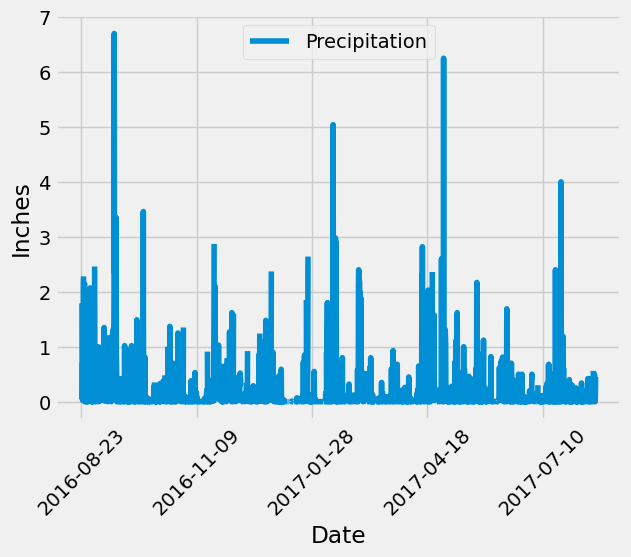

In [154]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(measurement.prcp)


# Calculate the date one year from the last date in data set.
p_y = dt.datetime.strptime("2017-08-23", "%Y-%m-%d").date() - dt.timedelta(365)

# Perform a query to retrieve the data and precipitation scores
data_and_prec = session.query(measurement.date, measurement.prcp).\
                        filter(measurement.date >= p_y).all()
    

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prec_df = pd.DataFrame(data_and_prec, columns = ["Date", "Precipitation"])

# Sort the dataframe by date
prec_df = prec_df.sort_values("Date").set_index("Date")


# Use Pandas Plotting with Matplotlib to plot the data
prec_df.plot(figsize=(6.5, 5), rot = 45, grid = True, xlabel = "Date", ylabel = "Inches")

plt.show()



In [155]:
#df.describe
prec_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2230 entries, 2016-08-23 to 2017-08-23
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Precipitation  2021 non-null   float64
dtypes: float64(1)
memory usage: 34.8+ KB


In [156]:
# Use Pandas to calculate the summary statistics for the precipitation data
prec_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [157]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.id)).all()

[(9,)]

In [158]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count()).group_by(measurement.station).\
              order_by(func.count().desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [175]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

station_best = session.query(func.min(measurement.tobs), 
                             func.max(measurement.tobs), 
                             func.avg(measurement.tobs)).\
              filter(measurement.station == 'USC00519281').all()

station_best

[(54.0, 85.0, 71.66378066378067)]

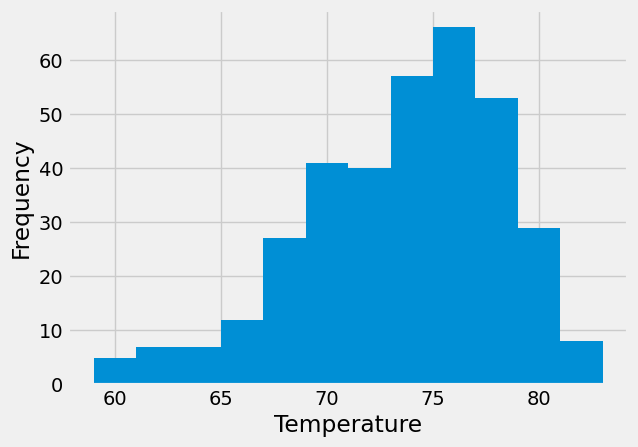

In [180]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_active = session.query(measurement.station, measurement.tobs).\
                        filter(measurement.station == 'USC00519281').\
                        filter(measurement.date >= p_y).all()
                        

temp_df = pd.DataFrame(most_active, columns = ["station", "temperature"])

temp_df.hist(figsize=(7, 5), rot = 0, by = 'station', grid = True, bins=  12)



plt.title('')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.show()

# Close Session

In [182]:
# Close Session
session.close()